In [1]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Nets_original  import GetNeuralNetworkModel
from Stats import WeightQuantization, ActivationStats, CheckAccuracyAndLoss, QuantizationEffect, GetReadAndWrites
from Training import GetDatasets
from Simulation import get_all_outputs
from Simulation import buffer_simulation, save_obj, load_obj
from funciones import compilNet, same_elements
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt




## Grafic all dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = range(1,5)
y = range(1,5)
plt.bar(x, y, fill=False, hatch='/')
plt.show()

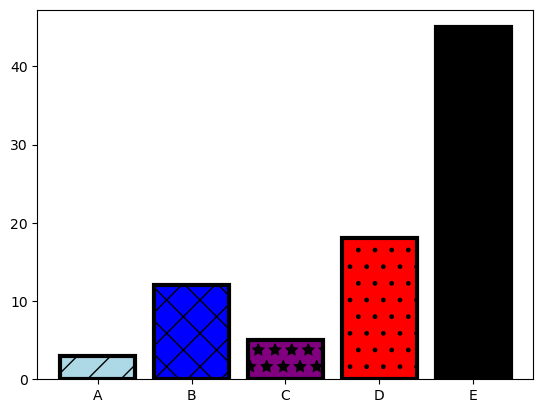

In [11]:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')

df = pd.DataFrame({'height': height,
                   'bars': bars})

color = ['lightblue', 'blue', 'purple', 'red', 'black']
edgecolor = ['Blak', 'orange', 'darkblue', 'darkred', 'yellow']
hatch =['/','x','*','.','o']
#x, o, O, ., *

# Create bars
fig, ax = plt.subplots()
ax.bar(df['bars'], df['height'],
       color=color, hatch=hatch,
       edgecolor='k',
       linewidth=3)

# Show graph
plt.show()

In [67]:
import pandas as pd
Resumen_all_dataset=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='graf_base_all_dataset',usecols=["redes","Base_Col","F+P_Col","Base_Cif", "F+P_Cif","Base_Ima","F+P_Ima"] )
Resumen_all_dataset= Resumen_all_dataset.set_index("redes")
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])
Resumen_all_dataset

,Base_Col,F+P_Col,Base_Cif,F+P_Cif,Base_Ima,F+P_Ima
redes,,,,,,
AlexNet,0.499981,0.999963,0.000000,0.000000,0.727858,0.999463
DenseNet,0.722654,1.002956,0.000000,0.000000,0.944860,0.998598
MobileNet,0.142209,0.992436,0.561534,0.999485,0.508509,0.991831
Inception,0.171875,0.973958,0.000000,0.000000,0.000000,0.000000
ResNet,0.635468,1.000000,0.000000,0.000000,0.000000,0.000000
SqueezeNet,0.131800,0.989936,0.136919,0.998500,0.146199,0.989899
VGG16,0.145701,0.996730,0.120338,0.999231,0.205369,0.991275
VGG19,0.510593,1.000000,0.766416,0.999802,0.000000,0.000000
Xception,0.146018,1.000000,0.000000,0.000000,0.000000,NaN


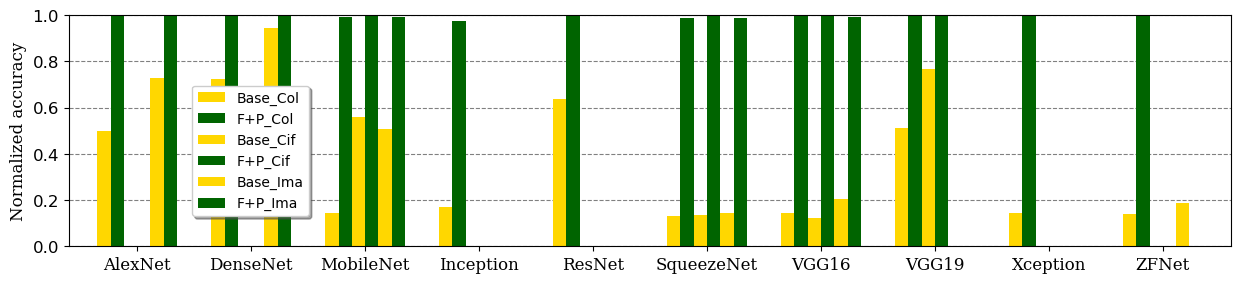

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(Resumen_all_dataset.index)

 
x = np.arange(n)
coloresRedes = ['gold', 'darkgreen','gold', 'darkgreen','gold', 'darkgreen']
#coloresRedes = ['gold', 'darkorange','tomato','mediumseagreen', 'darkgreen','k']
hatch =['/','/','x','x','*','*','/','/','x','x']
#hatch =['/', '/']
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(20,5), dpi=100)

Resumen_all_dataset.plot(kind ='bar', width = 0.70, fontsize=12, color = coloresRedes, figsize=(15,3), zorder=2 );
plt.legend(  fontsize=10, loc ="best",bbox_to_anchor=(0.1,0.1), shadow = True)
#plt.legend(  fontsize=11, bbox_to_anchor=(0.653,0.2),shadow = True)
plt.ylim(0,1.0)
plt.ylabel('Normalized accuracy', fontsize=12, fontfamily="serif")
plt.xlabel('')
plt.xticks(x, Resumen_all_dataset.index, fontsize= 12, fontfamily="serif")
plt.xticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.savefig('summary_acc_exp_all_nets.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#pdfFile=PdfPages("Analizando_fichero_detalle\Alterado_fichero\concretando análisis\gráficos\Resumen_acc_experimentos.pdf")
#pdfFile.savefig(fig, transparent = True, bbox_inches = 'tight', pad_inches = 0)
#pdfFile.close()


In [130]:


serotype_df = pd.DataFrame({'Colorectal': {('AlexNet', "Base"): 0.50,
  ('AlexNet', "F+P"): 1,
  ('DenseNet', "Base"): 0.72,
  ('DenseNet', "F+P"): 1,
  ('MobileNet', "Base"): 0.14,
  ('MobileNet', "F+P"): 0.99,
  ('Inception', "Base"): 0.17,
  ('Inception', "F+P"): 0.97,
  ('ResNet', "Base"): 0.63,
  ('ResNet', "F+P"): 1,
  ('SqueezeNet', "Base"): 0.13,
  ('SqueezeNet', "F+P"): 0.99,
  ('VGG16', "Base"): 0.14,
  ('VGG16', "F+P"): 0.99,
  ('VGG19', "Base"): 0.51,
  ('VGG19', "F+P"):1,
  ('Xception', "Base"): 0.14,
  ('Xception', "F+P"): 1,
    ('ZFNet', "Base"): 0.14,
  ('ZFNet', "F+P"): 1},
                            
 'Cifar': {('AlexNet', "Base"): 0,
  ('AlexNet', "F+P"): 0,
  ('DenseNet', "Base"): 0,
  ('DenseNet', "F+P"): 0,
  ('MobileNet', "Base"):0.56,
  ('MobileNet', "F+P"): 0.99,
  ('Inception', "Base"): 0,
  ('Inception', "F+P"): 0,
  ('ResNet', "Base"): 0,
  ('ResNet', "F+P"): 0,
  ('SqueezeNet', "Base"): 0.13,
  ('SqueezeNet', "F+P"): 0.99,
  ('VGG16', "Base"): 0.12,
  ('VGG16', "F+P"): 0.99,
  ('VGG19', "Base"): 0.76,
  ('VGG19', "F+P"): 1,
  ('Xception', "Base"): 0,
  ('Xception', "F+P"): 0,
  ('ZFNet', "Base"): 0,
  ('ZFNet', "F+P"): 0},
 'Imagennette': {('AlexNet', "Base"): 0.72,
  ('AlexNet', "F+P"): 0.99,
  ('DenseNet', "Base"): 0.94,
  ('DenseNet', "F+P"): 0.99,
  ('MobileNet', "Base"): 0.5,
  ('MobileNet', "F+P"): 0.99,
  ('Inception', "Base"): 0,
  ('Inception', "F+P"): 0,
  ('ResNet', "Base"): 0,
  ('ResNet', "F+P"): 0,
  ('SqueezeNet', "Base"): 0.14,
  ('SqueezeNet', "F+P"): 0.99,
  ('VGG16', "Base"): 0.20,
  ('VGG16', "F+P"): 0.99,
  ('VGG19', "Base"): 0,
  ('VGG19', "F+P"): 0,
  ('Xception', "Base"): 0,
  ('Xception', "F+P"): 0,
    ('ZFNet', "Base"): 0.18,
  ('ZFNet', "F+P"): 0.99}})

In [131]:
serotype_df

Colorectal  Cifar  Imagennette
AlexNet    Base        0.50   0.00         0.72
           F+P         1.00   0.00         0.99
DenseNet   Base        0.72   0.00         0.94
           F+P         1.00   0.00         0.99
MobileNet  Base        0.14   0.56         0.50
           F+P         0.99   0.99         0.99
Inception  Base        0.17   0.00         0.00
           F+P         0.97   0.00         0.00
ResNet     Base        0.63   0.00         0.00
           F+P         1.00   0.00         0.00
SqueezeNet Base        0.13   0.13         0.14
           F+P         0.99   0.99         0.99
VGG16      Base        0.14   0.12         0.20
           F+P         0.99   0.99         0.99
VGG19      Base        0.51   0.76         0.00
           F+P         1.00   1.00         0.00
Xception   Base        0.14   0.00         0.00
           F+P         1.00   0.00         0.00
ZFNet      Base        0.14   0.00         0.18
           F+P         1.00   0.00         0.99

In [132]:
serotype_df.to_excel('Grafica_all_dataset.xlsx', sheet_name='all_dataset', index=False)

<class 'numpy.ndarray'>
0 AxesSubplot(0.834322,0.11;0.065678x0.77)
1 AxesSubplot(0.834322,0.11;0.065678x0.77)
2 AxesSubplot(0.834322,0.11;0.065678x0.77)
3 AxesSubplot(0.834322,0.11;0.065678x0.77)
4 AxesSubplot(0.834322,0.11;0.065678x0.77)
5 AxesSubplot(0.834322,0.11;0.065678x0.77)
6 AxesSubplot(0.834322,0.11;0.065678x0.77)
7 AxesSubplot(0.834322,0.11;0.065678x0.77)
8 AxesSubplot(0.834322,0.11;0.065678x0.77)
9 AxesSubplot(0.834322,0.11;0.065678x0.77)


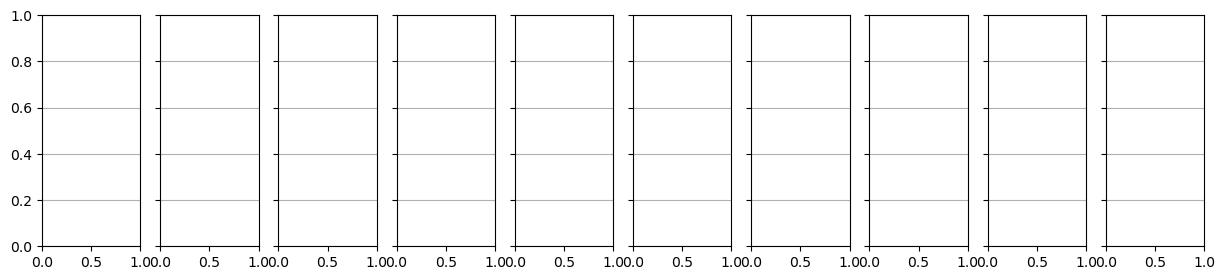

In [212]:
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(15, 3), zorder=2)  # width, height
plt.ylim(0,1.0)
print(type(axes))
for i,axes in enumerate(axes):
    axes.yaxis.grid(True)
    print(i,n)
   

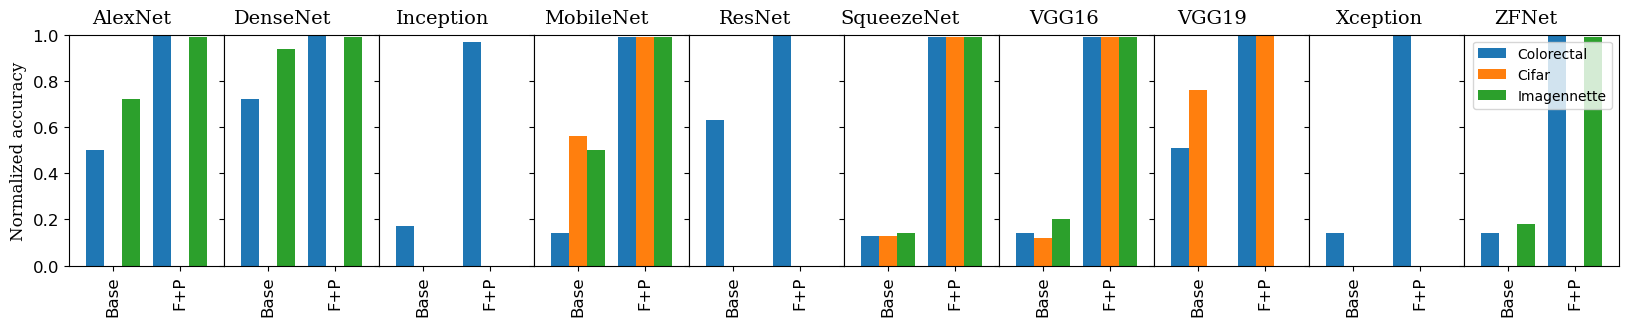

In [326]:
def plot_function(x, ax):
    ax = graph[x]
    #ax.set_xlabel(x, weight='bold')
    #ax.set_xlabel(x)
    ax.set_ylabel('Normalized accuracy', fontsize=12,fontfamily="serif")
    
    plt.xticks(rotation = 0)
    
    
    
    return serotype_df.xs(x).plot(kind='bar', ax=ax, legend=False, width=0.8,fontsize=12)

n_subplots = len(serotype_df.index.levels[0])
x=serotype_df.index.levels[1]


fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(20, 3), zorder=2)  # width, height
plt.ylim(0,1.0)
#print(type(axes))
#for i,n in enumerate(axes):
#    n.yaxis.grid(True)
    


graph = dict(zip(serotype_df.index.levels[0], axes))
#print(graph)
#print('axes',axes)

plots = list(map(lambda x: plot_function(x, graph[x]), graph))
#ax.tick_params(axis='x', which='both', length=0, reset=bool,direction='in')

#ax.set_xticks(x,fontsize= 12, fontfamily="serif")



#ax.tick_params(which='both', length=0)
fig.subplots_adjust(wspace=0)
#plt.xticks(rotation = 0)
plt.legend(  fontsize=12, loc='best',shadow = True)
#plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
plt.legend()



plt.text(-21, 1.05, 'AlexNet', fontsize=14, fontfamily="serif")
plt.text(-18.9, 1.05, 'DenseNet', fontsize=14, fontfamily="serif")
plt.text(-16.5, 1.05, 'Inception', fontsize=14, fontfamily="serif")
plt.text(-14.3, 1.05, 'MobileNet', fontsize=14, fontfamily="serif")
plt.text(-11.7, 1.05, 'ResNet', fontsize=14, fontfamily="serif")
plt.text(-9.9, 1.05, 'SqueezeNet', fontsize=14, fontfamily="serif")
plt.text(-7.1, 1.05, 'VGG16', fontsize=14, fontfamily="serif")
plt.text(-4.9, 1.05, 'VGG19', fontsize=14, fontfamily="serif")
plt.text(-2.55, 1.05, 'Xception', fontsize=14, fontfamily="serif")
plt.text(-0.2, 1.05, 'ZFNet', fontsize=14, fontfamily="serif")
#plt.savefig('All_dataset_redes.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [68]:
import pandas as pd
graf_all_datas=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='graf_base_all_dataset_art',usecols=["Técnica","Colorectal","CIFAR-10", "Imagenette"] )
graf_all_datas= graf_all_datas.set_index("Técnica")
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])
graf_all_datas

,Colorectal,CIFAR-10,Imagenette
Técnica,,,
Base,0.499981,0.669492,0.727858
F+P,0.999963,0.998044,0.999463
Base,0.722654,0.115421,0.944860
F+P,1.002956,0.983262,0.998598
Base,0.171875,0.115030,0.000000
F+P,0.973958,0.996987,0.000000
Base,0.142209,0.561534,0.508509
F+P,0.992436,0.999485,0.991831
Base,0.635468,0.470538,0.000000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
import matplotlib as mpl  
mpl.rcParams['font.family']='serif'

n = len(graf_all_datas.index)

 
x = np.arange(n)
coloresRedes = [ '#1f77b4','darkorange', '#2ca02c']
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(20,5), dpi=100)

graf_all_datas.plot(kind ='bar', width = 0.70, fontsize=12, color = coloresRedes, figsize=(15,3), zorder=2 );
lg = plt.legend(  fontsize=12, loc ="lower left",bbox_to_anchor=(0.30,1.02), shadow = False, ncol=3, columnspacing=0.9)
lg.draw_frame(False)
#mpl.rc('font',family='Times New Roman')


#plt.legend(  fontsize=11, bbox_to_anchor=(0.653,0.2),shadow = True)
plt.ylim(0,1.0)
plt.ylabel('Normalized accuracy', fontsize=12, fontfamily="serif")
plt.xlabel('')
plt.xticks(x, graf_all_datas.index, fontsize= 12, fontfamily="serif")
plt.xticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')


plt.axvline(x=1.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=3.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=5.4, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=7.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=9.4, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=13.5, ymax= 5, color="black",linewidth=0.5)#vgg16
plt.axvline(x=15.4, ymax= 5, color="black",linewidth=0.5)#vgg19
plt.axvline(x=17.38, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=19.5, ymax= 5, color="black",linewidth=0.5)#zf
#plt.axvline(x=20.5, ymax= 5, color="black")#avg


plt.text(-0.2, -0.2, 'AlexNet', fontsize=12, fontfamily="serif")
plt.text(1.7, -0.2, 'DenseNet', fontsize=12, fontfamily="serif")
plt.text(3.7, -0.2, 'Inception', fontsize=12, fontfamily="serif")
plt.text(5.7, -0.2, 'MobileNet', fontsize=12, fontfamily="serif")
plt.text(7.9, -0.2, 'ResNet', fontsize=12, fontfamily="serif")
plt.text(9.6,-0.2, 'SqueezeNet', fontsize=12, fontfamily="serif")
plt.text(12.1, -0.2, 'VGG16', fontsize=12, fontfamily="serif")
plt.text(13.9, -0.2, 'VGG19', fontsize=12, fontfamily="serif")
plt.text(15.8, -0.2,'Xception' , fontsize=12, fontfamily="serif")
plt.text(18.1, -0.2, 'ZFNet', fontsize=12, fontfamily="serif")
plt.text(20.2, -0.2, 'Avg', fontsize=12, fontfamily="serif")

plt.savefig('All_dataset_redes_2.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
#plt.savefig('summary_acc_exp_all_nets.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#pdfFile=PdfPages("Analizando_fichero_detalle\Alterado_fichero\concretando análisis\gráficos\Resumen_acc_experimentos.pdf")
#pdfFile.savefig(fig, transparent = True, bbox_inches = 'tight', pad_inches = 0)
#pdfFile.close()

NameError: name 'graf_all_datas' is not defined

## Figura 14 sin"Imagenette"

In [1]:
import pandas as pd
graf_all_datas=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='graf_base_all_dataset_art',usecols=["Técnica","Colorectal","CIFAR-10", ] )
graf_all_datas= graf_all_datas.set_index("Técnica")
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])
graf_all_datas

,Colorectal,CIFAR-10
Técnica,,
Base,0.499981,0.669492
F+P,0.999963,0.998044
Base,0.722654,0.115421
F+P,1.002956,0.983262
Base,0.171875,0.115030
F+P,0.973958,0.996987
Base,0.142209,0.561534
F+P,0.992436,0.999485
Base,0.635468,0.470538


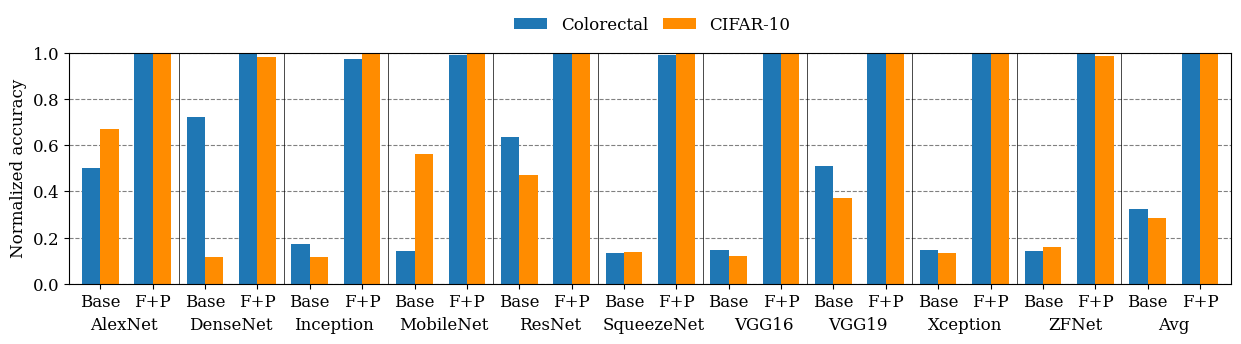

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
import matplotlib as mpl  
mpl.rcParams['font.family']='serif'

n = len(graf_all_datas.index)

 
x = np.arange(n)
coloresRedes = [ '#1f77b4','darkorange', '#2ca02c']
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(20,5), dpi=100)

graf_all_datas.plot(kind ='bar', width = 0.70, fontsize=12, color = coloresRedes, figsize=(15,3), zorder=2 );
lg = plt.legend(  fontsize=12, loc ="lower left",bbox_to_anchor=(0.37,1.02), shadow = False, ncol=3, columnspacing=0.9)
lg.draw_frame(False)
#mpl.rc('font',family='Times New Roman')


#plt.legend(  fontsize=11, bbox_to_anchor=(0.653,0.2),shadow = True)
plt.ylim(0,1.0)
plt.ylabel('Normalized accuracy', fontsize=12, fontfamily="serif")
plt.xlabel('')
plt.xticks(x, graf_all_datas.index, fontsize= 12, fontfamily="serif")
plt.xticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')


plt.axvline(x=1.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=3.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=7.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=9.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=13.5, ymax= 5, color="black",linewidth=0.5)#vgg16
plt.axvline(x=15.5, ymax= 5, color="black",linewidth=0.5)#vgg19
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=19.5, ymax= 5, color="black",linewidth=0.5)#zf
#plt.axvline(x=20.5, ymax= 5, color="black")#avg


plt.text(-0.2, -0.2, 'AlexNet', fontsize=12, fontfamily="serif")
plt.text(1.7, -0.2, 'DenseNet', fontsize=12, fontfamily="serif")
plt.text(3.7, -0.2, 'Inception', fontsize=12, fontfamily="serif")
plt.text(5.7, -0.2, 'MobileNet', fontsize=12, fontfamily="serif")
plt.text(8, -0.2, 'ResNet', fontsize=12, fontfamily="serif")
plt.text(9.6,-0.2, 'SqueezeNet', fontsize=12, fontfamily="serif")
plt.text(12.1, -0.2, 'VGG16', fontsize=12, fontfamily="serif")
plt.text(13.9, -0.2, 'VGG19', fontsize=12, fontfamily="serif")
plt.text(15.8, -0.2,'Xception' , fontsize=12, fontfamily="serif")
plt.text(18.1, -0.2, 'ZFNet', fontsize=12, fontfamily="serif")
plt.text(20.2, -0.2, 'Avg', fontsize=12, fontfamily="serif")

plt.savefig('All_dataset_redes_2_sin_imagenette.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
#plt.savefig('summary_acc_exp_all_nets.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#pdfFile=PdfPages("Analizando_fichero_detalle\Alterado_fichero\concretando análisis\gráficos\Resumen_acc_experimentos.pdf")
#pdfFile.savefig(fig, transparent = True, bbox_inches = 'tight', pad_inches = 0)
#pdfFile.close()

In [24]:
import pandas as pd
Resumen_x2_x3_4=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='graf_base',usecols=["redes","Base","I-A ECC", "ECC","Flip","F+P"] )
Resumen_x2_x3_4= Resumen_x2_x3_4.set_index("redes")
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


## Accutacy by technique 0.54 vol

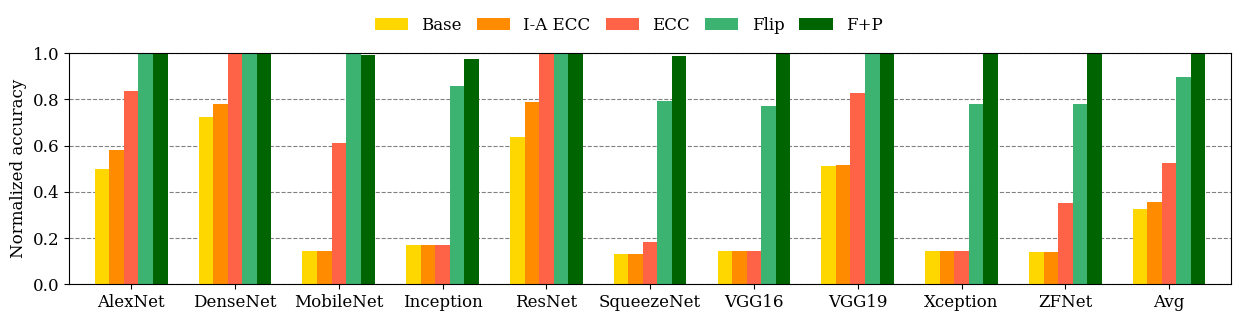

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(Resumen_x2_x3_4.index)

 
x = np.arange(n)

coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(20,5), dpi=100)

Resumen_x2_x3_4.plot(kind ='bar', width = 0.70, fontsize=12, color = coloresRedes, figsize=(15,3), zorder=2 );
#plt.legend(  fontsize=10, loc ="lower left",bbox_to_anchor=(0.1,0.1), shadow = True)
lg = plt.legend(  fontsize=12, loc ="lower left",bbox_to_anchor=(0.25,1.02), shadow = False, ncol=5, columnspacing=0.9)
lg.draw_frame(False)
#plt.legend(  fontsize=11, bbox_to_anchor=(0.653,0.2),shadow = True)
plt.ylim(0,1.0)
plt.ylabel('Normalized accuracy', fontsize=12, fontfamily="serif")
plt.xlabel('')
plt.xticks(x, Resumen_x2_x3_4.index, fontsize= 12, fontfamily="serif")
plt.xticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
plt.savefig('summary_acc_exp_all_nets_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#pdfFile=PdfPages("Analizando_fichero_detalle\Alterado_fichero\concretando análisis\gráficos\Resumen_acc_experimentos.pdf")
#pdfFile.savefig(fig, transparent = True, bbox_inches = 'tight', pad_inches = 0)
#pdfFile.close()


In [28]:
#import pandas as pd
#vol_054=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/concretando análisis/Analisis_LO_HO_and_both/Grap_parts_word.xlsx',sheet_name='graficar',
#                    )
#vol_054= vol_054.set_index("Mask")
#
#vol_056=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/concretando análisis/Analisis_LO_HO_and_both/Grap_parts_word.xlsx',sheet_name='56vol',
#                    )
#vol_056= vol_056.set_index("Mask")
#
#
#vol_058=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/concretando análisis/Analisis_LO_HO_and_both/Grap_parts_word.xlsx',sheet_name='58vol',
#                    )
#vol_058= vol_058.set_index("Mask")
#vol_054
#vol_056
#
#vol_058
##Resumen=pd.read_excel('Analizando_fichero_detalle/Altera

## Analysis of errors by type LO, HO and both

In [45]:
import pandas as pd
acc_low_and_high=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/concretando análisis/Analisis_LO_HO_and_both/analize_by_parts_v2.xlsx',sheet_name='Hoja1', usecols=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
acc_low_and_high= acc_low_and_high.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
acc_low_and_high
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])



,0.54 V,0.56 V,0.58 V
Tecnic,,,
LO,1.000000,0.000000e+00,0.000000
L&HO,1.000000,0.000000e+00,0.000000
HO,0.500000,3.443114e-01,0.155689
LO,1.000000,0.000000e+00,0.000000
L&HO,0.998544,1.455629e-03,0.000000
HO,0.720524,2.794760e-01,0.000000
LO,0.984375,3.124999e-02,-0.026042
L&HO,0.807292,1.927083e-01,0.000000
HO,0.171875,0.000000e+00,0.869792


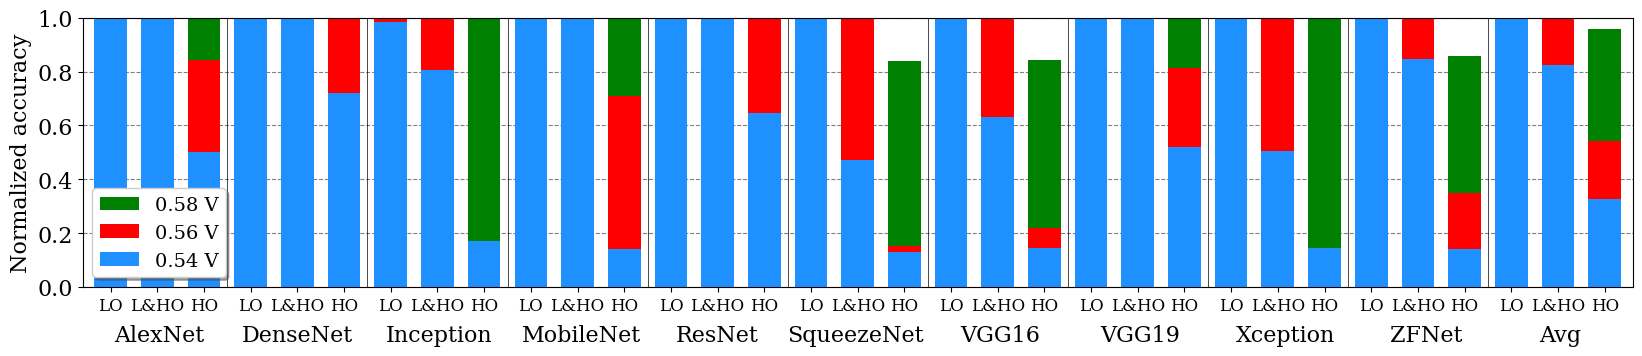

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(acc_low_and_high.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
coloresRedes = [ 'dodgerblue','red', 'green',]
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=acc_low_and_high.plot(kind ='bar' ,stacked = True,width = 0.70, color = coloresRedes,
                          figsize=(20,3.5),  zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized accuracy', fontsize=16, fontfamily="serif")
plt.xticks(x, acc_low_and_high.index, fontsize= 16, fontfamily="serif" )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)

plt.xticks(rotation = 0, fontsize=12)
plt.yticks(rotation = 0, fontsize=16)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=14,loc ="lower left",shadow = True)
#plt.legend(fontsize=14,loc ="lower left", shadow = True)
#["0.58","0.56","0.54"]

plt.text(0.08, -0.2, 'AlexNet', fontsize=16, fontfamily="serif")
plt.text(2.8, -0.2, 'DenseNet', fontsize=16, fontfamily="serif")
plt.text(5.9, -0.2, 'Inception', fontsize=16, fontfamily="serif")
plt.text(8.8, -0.2, 'MobileNet', fontsize=16, fontfamily="serif")
plt.text(12.1, -0.2, 'ResNet', fontsize=16, fontfamily="serif")
plt.text(14.5,-0.2, 'SqueezeNet', fontsize=16, fontfamily="serif")
plt.text(18.2, -0.2, 'VGG16', fontsize=16, fontfamily="serif")
plt.text(21.2, -0.2, 'VGG19', fontsize=16, fontfamily="serif")
plt.text(24.1, -0.2,'Xception' , fontsize=16, fontfamily="serif")
plt.text(27.4, -0.2, 'ZFNet', fontsize=16, fontfamily="serif")
plt.text(30.6, -0.2, 'Avg', fontsize=16, fontfamily="serif")

plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('acc_low_and_high_and_both_stacked_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)


## Mors Analysis of errors by type LO, HO and both

In [73]:
pwd

'C:\\Users\\usuario\\Desktop\\CNN_Gating'

In [76]:
import pandas as pd
Mors_acc_low_and_high=pd.read_excel('MoRS/Analisis_Resultados/Palabras_x_tipo/palabras_x_tipo.xlsx',sheet_name='Grafica_stacked_mors', usecols=["Tecnic" ,"acc_normal"])
Mors_acc_low_and_high= Mors_acc_low_and_high.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
Mors_acc_low_and_high
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])



,acc_normal
Tecnic,
LO,1.002994
L&HO,0.535928
HO,0.224551
LO,1.004380
L&HO,0.672993
HO,0.128467
LO,0.864583
L&HO,0.171875
HO,0.171875


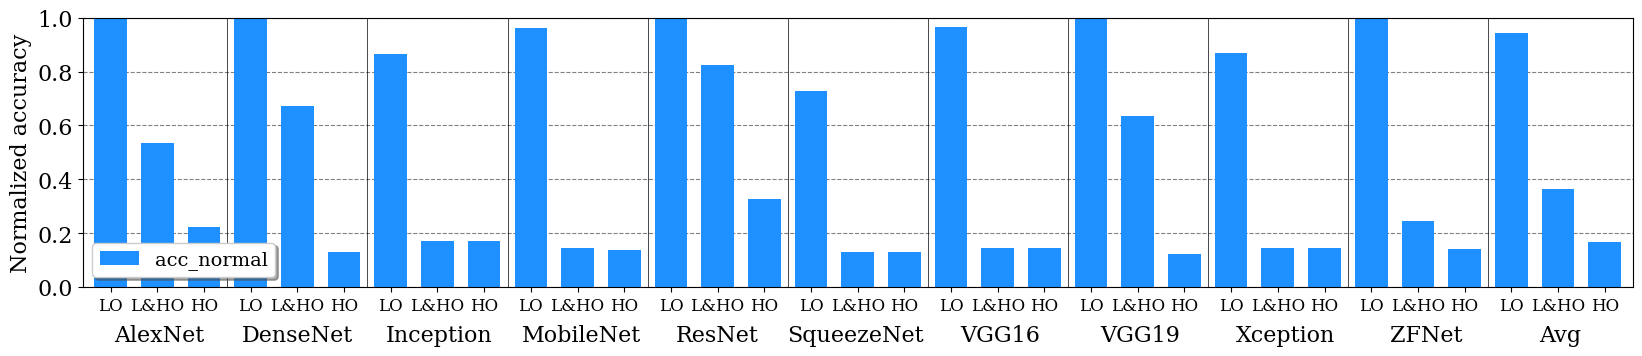

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(Mors_acc_low_and_high.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
coloresRedes = [ 'dodgerblue','red', 'green',]
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=Mors_acc_low_and_high.plot(kind ='bar' ,stacked = False,width = 0.70, color = coloresRedes,
                          figsize=(20,3.5),  zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized accuracy', fontsize=16, fontfamily="serif")
plt.xticks(x, Mors_acc_low_and_high.index, fontsize= 16, fontfamily="serif" )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)

plt.xticks(rotation = 0, fontsize=12)
plt.yticks(rotation = 0, fontsize=16)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')

#handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [2,1,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=14,loc ="lower left",shadow = True)
plt.legend(fontsize=14,loc ="lower left", shadow = True)
#["0.58","0.56","0.54"]

plt.text(0.08, -0.2, 'AlexNet', fontsize=16, fontfamily="serif")
plt.text(2.8, -0.2, 'DenseNet', fontsize=16, fontfamily="serif")
plt.text(5.9, -0.2, 'Inception', fontsize=16, fontfamily="serif")
plt.text(8.8, -0.2, 'MobileNet', fontsize=16, fontfamily="serif")
plt.text(12.1, -0.2, 'ResNet', fontsize=16, fontfamily="serif")
plt.text(14.5,-0.2, 'SqueezeNet', fontsize=16, fontfamily="serif")
plt.text(18.2, -0.2, 'VGG16', fontsize=16, fontfamily="serif")
plt.text(21.2, -0.2, 'VGG19', fontsize=16, fontfamily="serif")
plt.text(24.1, -0.2,'Xception' , fontsize=16, fontfamily="serif")
plt.text(27.4, -0.2, 'ZFNet', fontsize=16, fontfamily="serif")
plt.text(30.6, -0.2, 'Avg', fontsize=16, fontfamily="serif")

plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
#plt.savefig('Mors_acc_low_and_high_and_both_stacked_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

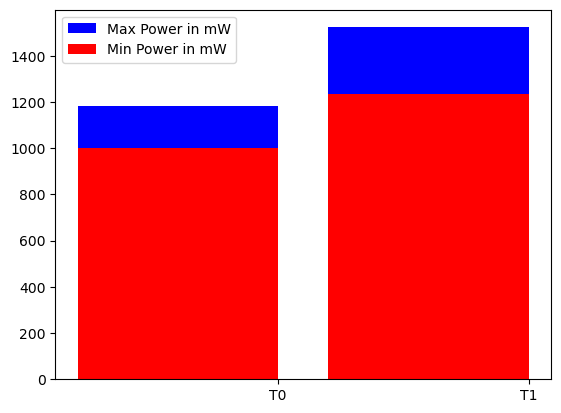

In [6]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.8

highPower   = [1184.53,1523.48,]
lowPower    = [1000.95,1233.37,]
L_H_O= []

indices = np.arange(len(highPower))

plt.bar(indices, highPower, width=width, 
        color='b', label='Max Power in mW')
plt.bar([i for i in indices], lowPower, 
        width=1.0*width, color='r', alpha=1.0, label='Min Power in mW')

plt.xticks(indices+width/2., 
           ['T{}'.format(i) for i in range(len(highPower))] )

plt.legend()

plt.show()

## Softmax

In [120]:
#data= data.set_index("df_experimentos")
import pandas as pd
AlexNet =pd.read_excel('Analizando_fichero_detalle\Alterado_fichero\concretando análisis\diferencias_softmax\AlexNet_diff_softmax_imagenes.xlsx',sheet_name='softmax_exp')
DenseNet =pd.read_excel('Analizando_fichero_detalle\Alterado_fichero\concretando análisis\diferencias_softmax\DenseNet_diff_softmax_imagenes.xlsx',sheet_name='softmax_exp')
Inception =pd.read_excel('Analizando_fichero_detalle\Alterado_fichero\concretando análisis\diferencias_softmax\Inception_diff_softmax.xlsx',sheet_name='softmax_exp')
MobileNet =pd.read_excel('Analizando_fichero_detalle\Alterado_fichero\concretando análisis\diferencias_softmax\MobileNet_diff_softmax_imagenes.xlsx',sheet_name='softmax_exp')
ResNet = pd.read_excel('Analizando_fichero_detalle\Alterado_fichero\concretando análisis\diferencias_softmax\ResNet_diff_softmax.xlsx',sheet_name='softmax_exp')


In [121]:
Xception

NameError: name 'Xception' is not defined

C:\Users\usuario\AppData\Local\Temp\ipykernel_13432\1692425389.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(full_label, rotation=90,fontfamily="serif")


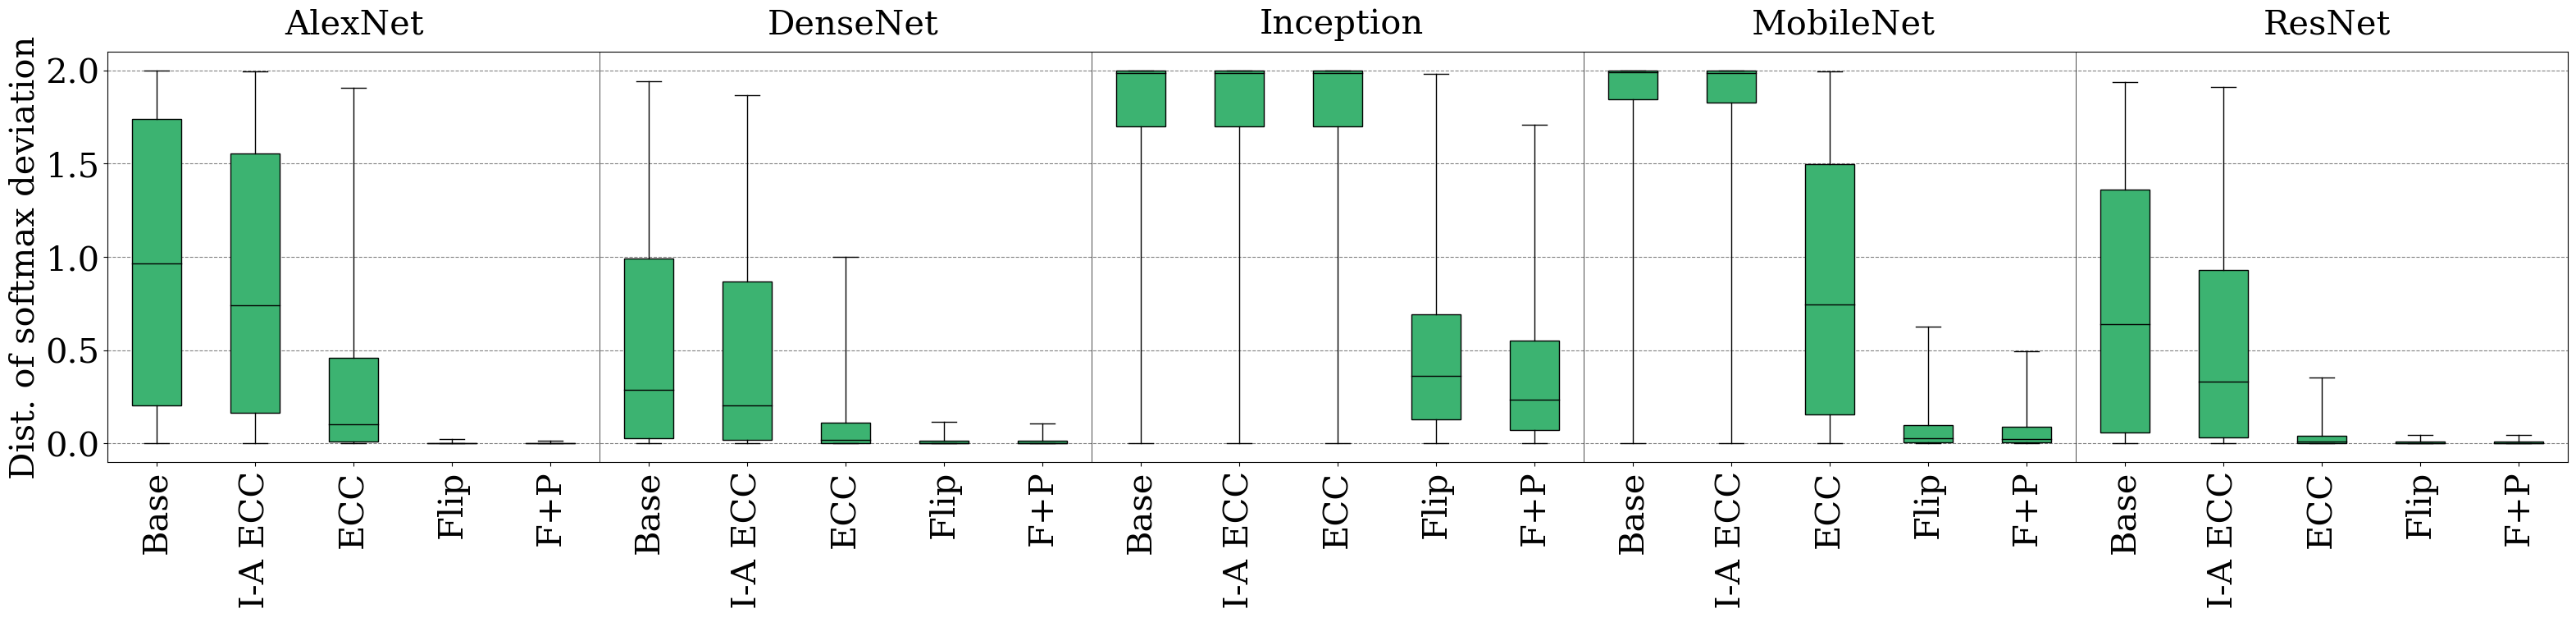

In [126]:



fig = plt.figure()
fig.set_size_inches(30, 5)


ax = fig.add_axes([0, 0, 1, 1])


nets_width = 0.1
box_width = 0.1
experiments = 5

nets = []
nets.append(AlexNet)
nets.append(DenseNet)
nets.append(Inception)
nets.append(MobileNet)
nets.append(ResNet)
#nets.append(SqueezeNet)
#nets.append(VGG16)
#nets.append(VGG19)
#nets.append(Xception)
#nets.append(ZFNet)


#colors = ["b", "gold", "darkorange", "r"]
#colors=['mediumseagreen','gold','maroon', 'b','magenta','r','pink','olivedrab','darkorange']
colors=['mediumseagreen','mediumseagreen','mediumseagreen', 'mediumseagreen','mediumseagreen']
full_label = ['Base',' I-A ECC','ECC','Flip','F+P']
empty_label = ['','','','','']
len_label=np.arange(len(full_label))
#len_abel=ax.set_xticks(np.arange(len(full_label)))
ax.set_xticklabels(full_label, rotation=90,fontfamily="serif")

for i, net in enumerate(nets):
     
    
    color = colors[i]
    label = full_label if 0 == i else empty_label
    
    bplot = ax.boxplot(net,
                       labels=full_label,
                       
                       #positions=np.array(range(experiments)) * nets_width + i * box_width,
                       positions=np.array(range(experiments))+5*i,
                       showmeans = False,
                       widths=0.5,
                       boxprops = dict(facecolor = color),
                       medianprops = dict(color = "black", linewidth = 1),
                       meanprops = dict(color = "black", linewidth = 1),
                       patch_artist=True,
                       meanline = False,
                       showfliers = True,whis=5500)
    
plt.ylabel("Dist. of softmax deviation", fontsize=30, fontfamily="serif")
plt.grid(axis='y', color = 'gray', linestyle = 'dashed') ### colocarlo por detrás de las barras    
plt.axvline(x=4.5, ymax= 5, color="black", linewidth=0.5)
plt.axvline(x=9.5, ymax= 5, color="black", linewidth=0.5)
plt.axvline(x=14.5, ymax= 5, color="black", linewidth=0.5)
plt.axvline(x=19.5, ymax= 5, color="black", linewidth=0.5)
plt.axvline(x=24.5, ymax= 5, color="black", linewidth=0.5)
#plt.axvline(x=29.5, ymax= 5, color="black", linewidth=0.5)
#plt.axvline(x=34.5, ymax= 5, color="black", linewidth=0.5)
#plt.axvline(x=39.5, ymax= 5, color="black", linewidth=0.5)
#plt.axvline(x=44.5, ymax= 5, color="black", linewidth=0.5)

plt.text(1.3, 2.2, 'AlexNet', fontsize=30, fontfamily="serif")
plt.text(6.2, 2.2, 'DenseNet', fontsize=30, fontfamily="serif")
plt.text(11.2, 2.2, 'Inception', fontsize=30, fontfamily="serif")
plt.text(16.2, 2.2, 'MobileNet', fontsize=30, fontfamily="serif")
plt.text(21.4, 2.2, 'ResNet', fontsize=30, fontfamily="serif")
#plt.text(25, 2.2, 'SqueezeNet', fontsize=25, fontfamily="serif")
#plt.text(30.8, 2.2, 'VGG16', fontsize=25, fontfamily="serif")
#plt.text(35.8, 2.2, 'VGG19', fontsize=25, fontfamily="serif")
#plt.text(40.9, 2.2, 'Xception', fontsize= 25, fontfamily="serif")
#plt.text(45.9, 2.2, 'ZFNet', fontsize= 25, fontfamily="serif")
#
plt.grid(axis='y', color = 'gray', linestyle = 'dashed', )
plt.xticks( fontsize= 30, fontfamily="serif" )

plt.yticks([0,0.5,1,1.5,2], fontsize= 30 , fontfamily="serif" )
#plt.axvline(x=29, ymax= 5, color="black")   
 
#ax.set_xticks(np.arange(len(full_label)))

#ax.set_xticklabels(full_label, rotation=0, fontsize=8)
plt.savefig('diff_softmax_all_nets_f_p_parte1.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
                       

In [128]:
SqueezeNet =pd.read_excel('Analizando_fichero_detalle\Alterado_fichero\concretando análisis\diferencias_softmax\SqueezeNet_diff_softmax_imagenes.xlsx',sheet_name='softmax_exp')
ZFNet =pd.read_excel('Analizando_fichero_detalle\Alterado_fichero\concretando análisis\diferencias_softmax\ZFNet_diff_softmax_imagenes.xlsx',sheet_name='softmax_exp')
VGG16 =pd.read_excel('Analizando_fichero_detalle\Alterado_fichero\concretando análisis\diferencias_softmax\VGG16_diff_softmax_imagenes.xlsx',sheet_name='softmax_exp')
VGG19 =pd.read_excel('Analizando_fichero_detalle\Alterado_fichero\concretando análisis\diferencias_softmax\VGG19_diff_softmax.xlsx',sheet_name='softmax_exp')
Xception =pd.read_excel('Analizando_fichero_detalle\Alterado_fichero\concretando análisis\diferencias_softmax\Xception_softmax.xlsx',sheet_name='softmax_exp_prop')




C:\Users\usuario\AppData\Local\Temp\ipykernel_13432\2333555324.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(full_label, rotation=90,fontfamily="serif")


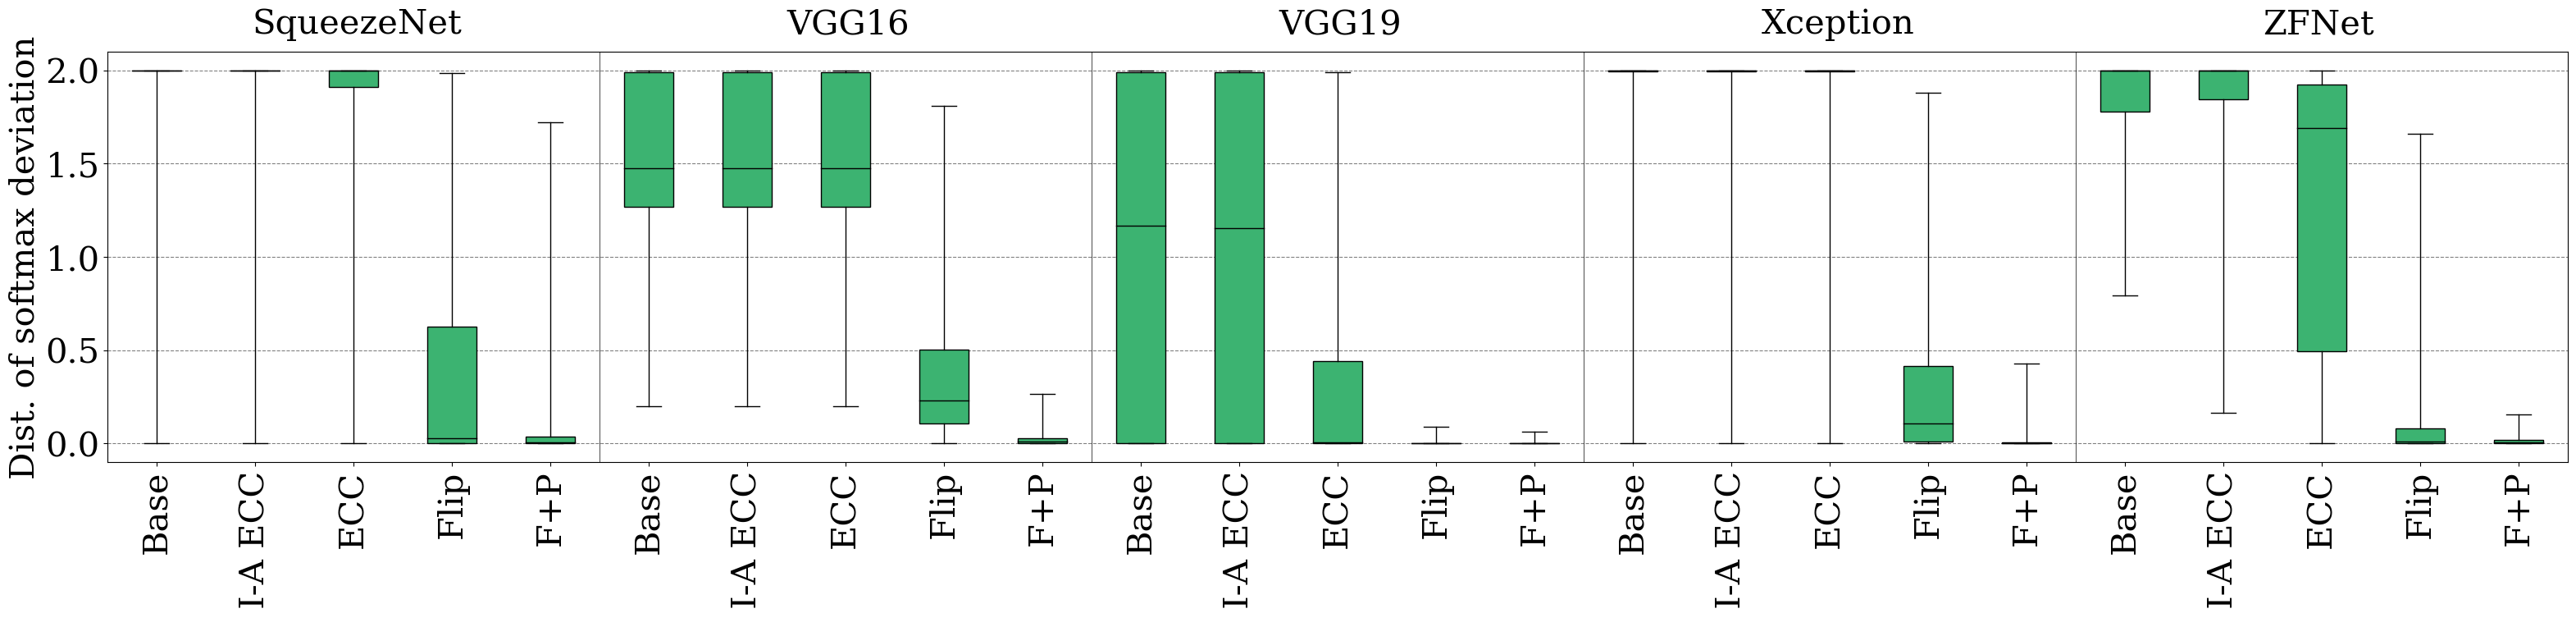

In [129]:
fig = plt.figure()
fig.set_size_inches(30, 5)


ax = fig.add_axes([0, 0, 1, 1])


nets_width = 0.1
box_width = 0.1
experiments = 5

nets = []
#nets.append(AlexNet)
#nets.append(DenseNet)
#nets.append(Inception)
#nets.append(MobileNet)
#nets.append(ResNet)
nets.append(SqueezeNet)
nets.append(VGG16)
nets.append(VGG19)
nets.append(Xception)
nets.append(ZFNet)



#colors = ["b", "gold", "darkorange", "r"]
#colors=['mediumseagreen','gold','maroon', 'b','magenta','r','pink','olivedrab','darkorange']
colors=['mediumseagreen','mediumseagreen','mediumseagreen', 'mediumseagreen','mediumseagreen',]
full_label = ['Base',' I-A ECC','ECC','Flip','F+P']
empty_label = ['','','','','']
len_label=np.arange(len(full_label))

ax.set_xticklabels(full_label, rotation=90,fontfamily="serif")

for i, net in enumerate(nets):
     
    
    color = colors[i]
    label = full_label if 0 == i else empty_label
    
    bplot = ax.boxplot(net,
                       labels=full_label,
                       
                       #positions=np.array(range(experiments)) * nets_width + i * box_width,
                       positions=np.array(range(experiments))+5*i,
                       showmeans = False,
                       widths=0.5,
                       boxprops = dict(facecolor = color),
                       medianprops = dict(color = "black", linewidth = 1),
                       meanprops = dict(color = "black", linewidth = 1),
                       patch_artist=True,
                       meanline = False,
                       showfliers = True,whis=5500)
    
plt.ylabel("Dist. of softmax deviation", fontsize=30, fontfamily="serif")    
plt.axvline(x=4.5, ymax= 5, color="black", linewidth=0.5)
plt.axvline(x=9.5, ymax= 5, color="black", linewidth=0.5)
plt.axvline(x=14.5, ymax= 5, color="black", linewidth=0.5)
plt.axvline(x=19.5, ymax= 5, color="black", linewidth=0.5)
plt.axvline(x=24.5, ymax= 5, color="black", linewidth=0.5)
#plt.axvline(x=29.5, ymax= 5, color="black", linewidth=0.5)
#plt.axvline(x=34.5, ymax= 5, color="black", linewidth=0.5)
#plt.axvline(x=39.5, ymax= 5, color="black", linewidth=0.5)
#plt.axvline(x=44.5, ymax= 5, color="black", linewidth=0.5)

plt.text(0.97, 2.2, 'SqueezeNet', fontsize=30, fontfamily="serif")
plt.text(6.4, 2.2, 'VGG16', fontsize=30, fontfamily="serif")
plt.text(11.4, 2.2, 'VGG19', fontsize=30, fontfamily="serif")
plt.text(16.3, 2.2, 'Xception', fontsize=30, fontfamily="serif")
plt.text(21.4, 2.2, 'ZFNet', fontsize=30, fontfamily="serif")
plt.grid(axis='y', color = 'gray', linestyle = 'dashed', )
plt.xticks( fontsize= 30, fontfamily="serif" )

plt.yticks([0,0.5,1,1.5,2], fontsize= 30 , fontfamily="serif" )
#plt.axvline(x=29, ymax= 5, color="black")   
#plt.grid(True)    
#ax.set_xticks(np.arange(len(full_label)))

#ax.set_xticklabels(full_label, rotation=0, fontsize=8)
plt.savefig('diff_softmax_all_nets_f_p_parte2.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
                       